In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
base = pd.read_csv('../AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('../AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dateparse)

ts = base['#Passengers']

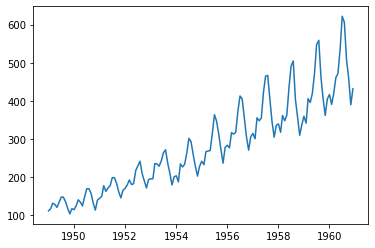

In [3]:
plt.plot(ts)
plt.show()

In [5]:
#decomposicao da serie temporal, criando uma variavel para cada formato
decomposicao = seasonal_decompose(ts)

In [7]:
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [8]:
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [9]:
#erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

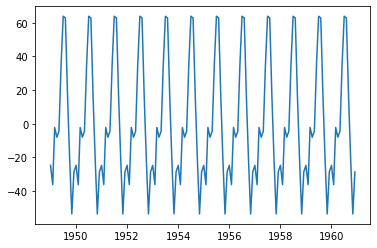

In [11]:
plt.plot(sazonal)
plt.show()

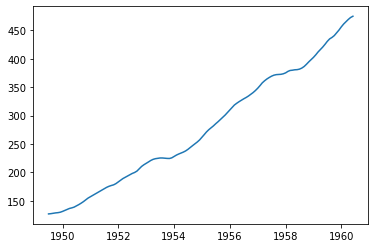

In [13]:
plt.plot(tendencia)
plt.show()

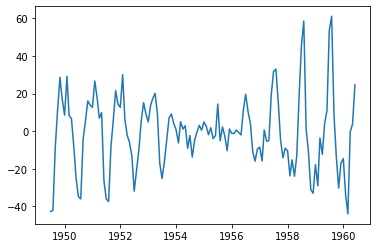

In [14]:
plt.plot(aleatorio)
plt.show()

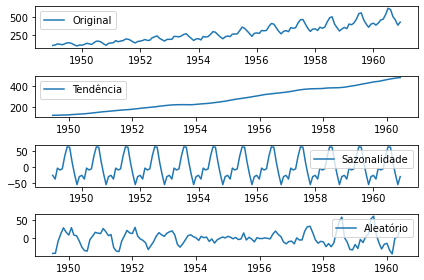

In [15]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

#visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

#visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

#visuzalição somente do elemento aleatorio
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc = 'best')
plt.tight_layout()